Assessment Task


Suggested possible analysis 

- What are the most important features for predicting X as a target variable?
- Which classification approach do you prefer for the prediction of X as a target variable, and why? o How to classify the loyal and churn customers using Support Vector Machines?
- Why is dimensionality reduction important in machine learning?

The pair would need to consider the following instructions (a - d) during the development of this pair project.
a) Logical justification based on the reasoning for the specific choice of machine learning approaches.
b) Multiple machine learning approaches (at least two) using hyperparameters and a comparison
between the chosen modelling approaches.
 c) Visualise your comparison of ML modelling outcomes. You may use a statistical approach to argue that one feature is more important than other features (for example, using PCA).
d) Cross-validation methods should be used to justify the authenticity of your ML results.
Your pair will present their findings and defend the results in the report (MS Doc or Open word format) by highlighting their individual contribution. Your report should capture the following aspects that are relevant
to 1.
2.
3.
4.
5.
your project investigations.
Motivation, a description of the problem domain, and an explanation of how the project's goals are justified using Prediction / Classification / Clustering Rules / Dimensionality Reduction etc..
(10 marks) Characterization of data, explanation and description of techniques used for the variation in the
accuracy across three training splits (10% / 20%/ 30%) using cross validation techniques.
(30 marks) Interpret and explain the results obtained, discuss overfitting / underfitting / generalisation, provide a rationale for the chosen model and use visualisations to support your findings. Comments in Python code, conclusions of the project should be specified at the end of the report. Harvard Style must be
used for citations and references.
(20 marks) Each team member presents a PowerPoint presentation of their work (maximum 5 slides) to emphasize their distinctive contributions based on their involvement in the project's conceptual
understanding, code development, and deployment.
(20 marks individual) Each team member fully described their individual contributions to the project in a reflective journal, using at least 500 to 700 words as well as images, diagrams, figures, and visualizations to elaborate
his/ her work.
Submission Requirements
All assessment submissions must meet the minimum requirements listed below. Failure to do so may have implications for the marks awarded.
● The code and datasets should be provided and uploaded in zip format on Moodle.
● Clearly detail the number of words used in the report.
● Number of Words in the report (2000 words +/-10%) excluding diagrams, code, references and
titles. Number of words used to express individual contributions is part of the mentioned words.
● In the case of individual submission, students will submit a (1000 words +/-10%) report.
● Describe the contribution of each team member in the project clearly and use a bar chart or pie
chart to represent the effort and time spent during this project. Use version control like Github or any other tool to show the progress of both team members in CA1. You should have at least 5 commits on Github before submission.
● The rubric is provided for the detailed breakdown of marks at the end of this CA1.
● Use Harvard Referencing when citing third party material
● Be the student’s own work.
● Include the CCT assessment cover page.
● Be submitted by the deadline date specified or be subject to late submission penalties
(20 marks individual)
 
● Note: The names of pair members must be uploaded on the link provided on Moodle until 15th October 2023 (23:59).
● Must be clearly specified the number of words used after each section in the report.

# DO CROSS VALIDATION AND ANN

# Librabries 

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

# EDA

In [2]:
bike = pd.read_csv("Seoul_Bike.csv")

DOI
10.24432/C5F62R
License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand


@misc{misc_seoul_bike_sharing_demand_560,
  title        = {{Seoul Bike Sharing Demand}},
  year         = {2020},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C5F62R}
}

In [3]:
bike.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
bike.tail(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
bike.shape

(8760, 14)

In [6]:
bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Changing from categorical to numerical

In [8]:
bike["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [9]:
bike["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [10]:
bike["Functioning Day"].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
bike['Seasons'].replace('Winter', 0, inplace = True)
bike['Seasons'].replace('Spring', 1, inplace = True)
bike['Seasons'].replace('Summer', 2, inplace = True)
bike['Seasons'].replace('Autumn', 3, inplace = True)

In [12]:
bike['Seasons'].tail(2)

8758    3
8759    3
Name: Seasons, dtype: int64

In [13]:
bike["Holiday"].replace('No Holiday', 0, inplace = True)
bike["Holiday"].replace('Holiday', 1, inplace = True)

In [14]:
bike["Holiday"].tail(2)

8758    0
8759    0
Name: Holiday, dtype: int64

In [15]:
bike["Functioning Day"].replace('No', 0, inplace = True)
bike["Functioning Day"].replace('Yes', 1, inplace = True)

In [16]:
bike["Functioning Day"].tail(2)

8758    1
8759    1
Name: Functioning Day, dtype: int64

# Graphics 

sns.histplot(data = bike, y = "Rented Bike Count", x = "Hour")

sns.histplot(data = bike, x = "Holiday")

sns.histplot(data = bike, x = "Functioning Day")

sns.histplot(data = bike, x = "Rented Bike Count")

sns.histplot(data = bike, x = "Temperature(°C)")

sns.histplot(data = bike, x = "Humidity(%)")



sns.histplot(data = bike, x = "Wind speed (m/s)")



sns.histplot(data = bike, x = "Visibility (10m)")

sns.histplot(data = bike, x = "Dew point temperature(°C)")

sns.histplot(data = bike, x = "Solar Radiation (MJ/m2)")


sns.histplot(data = bike, x = "Rainfall(mm)")

sns.histplot(data = bike, x = "Snowfall (cm)")

sns.histplot(data = bike, x = "Seasons")

The bikes have been used equally throughout the seasons 

The seasons have the same amount of observations but the number of rented bikes are different between seasons

bike.head(1)

bike.plot(x = "Temperature(°C)", y = "Rented Bike Count", style = "*")
plt.title("Rented Bike Count vs Temperature(°C)")
plt.xlabel("Temperature(°C)")
plt.ylabel("Rented Bike Count")
plt.show()

bike.plot(x = "Hour", y = "Rented Bike Count", style = "*")
plt.title("Rented Bike Count vs Hour")
plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.show()

sns.histplot(data = bike, x = "Seasons", y = "Rented Bike Count")

('Winter', 0, inplace = True)
('Spring', 1, inplace = True)
('Summer', 2, inplace = True)
('Autumn', 3, inplace = True)

sns.histplot(data = bike, x = "Seasons", y = "Temperature(°C)")

sns.boxplot(data = bike["Rented Bike Count"])

sns.boxplot(data = bike["Temperature(°C)"])

 sns.boxplot(data = bike["Visibility (10m)"])

# Correlation

bike.head(3)

bike_d = bike.drop(["Date"], axis = 1)

bike_d.head(3)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = bike_d.columns
vif_data["VIF"] = [variance_inflation_factor(bike_d.values, i) for i in range(bike_d.shape[1])]
print(vif_data)

corr_matrix = np.corrcoef(bike_d, rowvar = False)

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', 
            xticklabels = range(bike_d.shape[1]), yticklabels = range(bike_d.shape[1]))
plt.title("Feature Correlation Matrix")
plt.show()

The highest correlations are between: 
- Rented Bike Count & Temperature(°C) = 0.54 (0 & 2)
- Temperature(°C) & Dew point temperature(°C) = 0.91 (2 & 6)
- Temperature(°C) & Seasons = 0.59 (2 & 10)
- Humidity(%) & Visibility (10m) = 0.54 (3 & 5)
- Humidity(%) & Dew point temperature(°C) = 0.54 (3 & 6)
- Dew point temperature(°C) & Seasons = 0.58 (6 & 10)

import numpy as np

eigenvalues, _ = np.linalg.eig(corr_matrix)
print("Eigenvalues:", eigenvalues)


condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
print("Condition Number:", condition_number)


def find_highly_correlated_vars(corr_matrix, threshold = 0.5):
    if isinstance(corr_matrix, pd.DataFrame):
        corr_matrix = corr_matrix.values
    rows, cols = np.where(np.abs(corr_matrix) > threshold)
    unique_pairs = set((min(r, c), max(r, c)) for r, c in zip(rows, cols) if r != c)
    return list(unique_pairs)

corr_matrix = bike_d.corr()
highly_corr_vars = find_highly_correlated_vars(corr_matrix, threshold=0.5)

print("Pairs of highly correlated variables:", highly_corr_vars)

bike_d.head(1)

sns.pairplot(bike[["Rented Bike Count", "Temperature(°C)"]])

#sns.pairplot(bike[["Rented Bike Count", "Seasons"]])

sns.pairplot(bike[["Temperature(°C)", "Dew point temperature(°C)"]])

sns.pairplot(bike[["Temperature(°C)", "Seasons"]])

sns.pairplot(bike[["Humidity(%)", "Visibility (10m)"]])

sns.pairplot(bike[["Humidity(%)", "Dew point temperature(°C)"]])

sns.pairplot(bike[["Dew point temperature(°C)", "Seasons"]])

Rented Bike Count & Temperature(°C) = 0.54 (0 & 2)

Temperature(°C) & Dew point temperature(°C) = 0.91 (2 & 6)

Temperature(°C) & Seasons = 0.59 (2 & 10)

Humidity(%) & Visibility (10m) = 0.54 (3 & 5)

Humidity(%) & Dew point temperature(°C) = 0.54 (3 & 6)
Dew point temperature(°C) & Seasons = 0.58 (6 & 10

Multicollinearity

X = bike_d.iloc[:, 1:]  # All rows, columns from index 1 onwards (excluding the first column)
y = bike_d.iloc[:, 0]   # All rows, only the first column

In [17]:
bike_d2 = bike.drop(["Date", "Visibility (10m)", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day"], axis = 1)

In [18]:
bike_d2.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,0.0,0.0,0.0


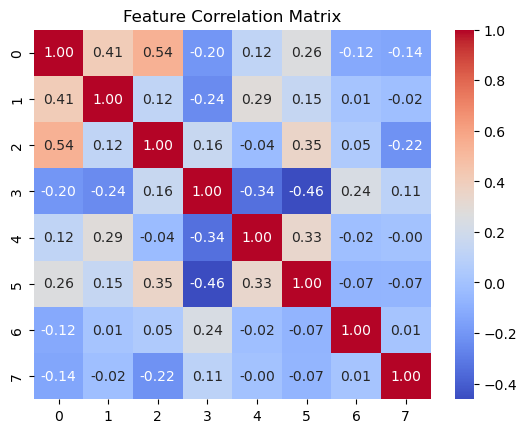

In [90]:
corr_matrix = np.corrcoef(bike_d2, rowvar = False)

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', 
            xticklabels = range(bike_d2.shape[1]), yticklabels = range(bike_d2.shape[1]))
plt.title("Feature Correlation Matrix")
plt.show()

In [91]:
import numpy as np

eigenvalues, _ = np.linalg.eig(corr_matrix)
print("Eigenvalues:", eigenvalues)

Eigenvalues: [2.30501078 1.48845607 0.22373965 0.43508645 0.62660268 0.8840208
 0.96495307 1.07213051]


In [92]:
condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
print("Condition Number:", condition_number)

Condition Number: 3.2097041653301455


In [94]:
def find_highly_correlated_vars(corr_matrix, threshold = 0.5):
    if isinstance(corr_matrix, pd.DataFrame):
        corr_matrix = corr_matrix.values
    rows, cols = np.where(np.abs(corr_matrix) > threshold)
    unique_pairs = set((min(r, c), max(r, c)) for r, c in zip(rows, cols) if r != c)
    return list(unique_pairs)

corr_matrix = bike_d2.corr()
highly_corr_vars = find_highly_correlated_vars(corr_matrix, threshold=0.5)

print("Pairs of highly correlated variables:", highly_corr_vars)

Pairs of highly correlated variables: [(0, 2)]


In [95]:
bike_d2.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,0.0,0.0,0.0


In [19]:
bike_array = bike_d2.values

In [20]:
X = bike_array[:, 1:]

y = bike_array[:, 0]

In [21]:
y

array([254., 204., 173., ..., 694., 712., 584.])

In [22]:
X

array([[ 0. , -5.2, 37. , ...,  0. ,  0. ,  0. ],
       [ 1. , -5.5, 38. , ...,  0. ,  0. ,  0. ],
       [ 2. , -6. , 39. , ...,  0. ,  0. ,  0. ],
       ...,
       [21. ,  2.6, 39. , ...,  0. ,  0. ,  0. ],
       [22. ,  2.1, 41. , ...,  0. ,  0. ,  0. ],
       [23. ,  1.9, 43. , ...,  0. ,  0. ,  0. ]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [24]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8760, 7), (8760,), (7008, 7), (1752, 7), (7008,), (1752,))

In [25]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled  = scaler.transform(X_test)

X_scaled = scaler.transform(X)

# Models

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_scaled, y_train)

yp_lr = linear_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_lr)
mse_r = mean_squared_error(y_test, yp_lr, squared = False)
r2 = r2_score(y_test, yp_lr)

n = len(y_test)
k = X_train_scaled.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 216628.77814566
Root Mean Squared Error: 465.43396754605266
R-squared: 0.46398066023961204
Adjusted R-squared: 0.46182920646763803


In [28]:
train_pred = linear_reg.predict(X_train_scaled)
test_pred = linear_reg.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

Training MSE: 221410.47406051576
Validation MSE: 216628.77814566


## A little bit overfitting but low R2

In [29]:
import tensorflow as tf
def huber_loss(y_test, yp_lr, delta=1.0):
    error = y_test - yp_lr
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_lr, delta=1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Huber Loss: [646.38644477 192.78762792 507.57713695 ... 178.51972985 232.87127327
  52.94341111]
Mean Huber Loss: 339.1764602203368


In [30]:
score_l = cross_val_score(LinearRegression(), X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_l

0.4593758323122934

In [31]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': yp_lr})
pred.head()

,Actual,Predicted
0,278.0,924.886445
1,96.0,-97.287628
2,215.0,723.077137
3,1290.0,1204.940332
4,165.0,688.878524


## Polynomial 2 and 3

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly_features = PolynomialFeatures(degree = 2)

X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

yp_p2 = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, yp_p2)
mse_r = mean_squared_error(y_test, yp_p2, squared = False)
r2 = r2_score(y_test, yp_p2)

n = len(y_test)
k = X_train_scaled.shape[1]  # Number of features
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 173892.26181136008
Root Mean Squared Error: 417.00391102645557
R-squared: 0.5697265332730072
Adjusted R-squared: 0.5679995182116029


In [34]:
score_lp2 = cross_val_score(poly_reg, X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_lp2

0.4593758323122934

In [35]:
pred_p2 = pd.DataFrame({'Actual': y_test, 'Predicted': yp_p2})
pred_p2.head()

,Actual,Predicted
0,278.0,641.280768
1,96.0,55.817418
2,215.0,695.881927
3,1290.0,1411.240311
4,165.0,441.798312


In [36]:
train_pred = poly_reg.predict(X_train_poly)
test_pred = poly_reg.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_p2, delta=1.0):
    error = y_test - yp_p2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_p2, delta=1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 179884.61340435053
Validation MSE: 173892.26181136008
Huber Loss: [362.78076805  39.68258151 480.38192733 ... 158.59363598  11.72397097
 197.63554304]
Mean Huber Loss: 296.13907805060893


## Not overfitting 

In [37]:
degree = 3
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

yp_p3 = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, yp_p3)
r2 = r2_score(y_test, yp_p3)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 211921.37621353226
R-squared: 0.47562850544856783


## Ridge

In [38]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)  # Adjust alpha based on the strength of regularization
ridge_reg.fit(X_train_scaled, y_train)

yp_lnR = ridge_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_lnR)
r2 = r2_score(y_test, yp_lnR)

print(f'Mean Squared Error (Ridge): {mse}')
print(f'R-squared (Ridge): {r2}')

Mean Squared Error (Ridge): 216737.3041829407
R-squared (Ridge): 0.4637121268741563


In [39]:
pred_lnR = pd.DataFrame({'Actual': y_test, 'Predicted': yp_lnR})
pred_lnR.head()

,Actual,Predicted
0,278.0,920.724925
1,96.0,-102.609284
2,215.0,720.632140
3,1290.0,1202.321952
4,165.0,682.596051


In [40]:
degree = 2

poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge_reg2 = Ridge(alpha = 10.0) 
ridge_reg2.fit(X_train_poly, y_train)

yp_rp2 = ridge_reg2.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, yp_rp2)
mse_ridge_r = mean_squared_error(y_test, yp_rp2, squared = False)
r2_ridge = r2_score(y_test, yp_rp2)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'Root Mean Squared Error: {mse_ridge_r}')
print(f'R-squared (Ridge): {r2_ridge}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error (Ridge): 186181.20384798557
Root Mean Squared Error: 431.48720009750645
R-squared (Ridge): 0.5393191670254971
Adjusted R-squared: 0.46155959527330714


In [41]:
score_rp2 = cross_val_score(ridge_reg2, X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_rp2

0.4408471910281132

In [42]:
train_pred = ridge_reg2.predict(X_train_poly)
test_pred = ridge_reg2.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_rp2, delta = 1.0):
    error = y_test - yp_rp2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_rp2, delta = 1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 191862.63178018117
Validation MSE: 186181.20384798557
Huber Loss: [423.49616516  21.04614644 432.9297126  ... 161.72461231 102.86306651
 120.36642429]
Mean Huber Loss: 305.2603225503822


## A little bit overfitting but significant difference between R2 and Adjusted R2

## Lasso

In [43]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1.0) 
lasso_reg.fit(X_train_scaled, y_train)

yp_lnL = lasso_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_lnL)
r2 = r2_score(y_test, yp_lnL)

print(f'Mean Squared Error (Lasso): {mse}')
print(f'R-squared (Lasso): {r2}')

Mean Squared Error (Lasso): 217628.13957105268
R-squared (Lasso): 0.461507872200985


In [44]:
degree = 2

poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
 
lasso_reg = Lasso(alpha = 10.0, max_iter = 100000)
lasso_reg.fit(X_train_poly, y_train)

yp_lp2 = lasso_reg.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, yp_lp2)
r2_lasso = r2_score(y_test, yp_lp2)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')

Mean Squared Error (Lasso): 207819.4462584602
R-squared (Lasso): 0.48577819010765166


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state = 12), param_grid, cv = 5, scoring = 'r2')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_best)
mse_r = mean_squared_error(y_test, y_pred_best, squared = False)
r2_best = r2_score(y_test, y_pred_best)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared (Best Model): {r2_best}')
print(f'Adjusted R-squared: {adj_r2}')

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 200}
Mean Squared Error: 103412.06923429851
Root Mean Squared Error: 321.57747003529107
R-squared (Best Model): 0.744120473979903
Adjusted R-squared: 0.4593464932476633


In [47]:
score_rf = cross_val_score(RandomForestRegressor(max_depth = 20,
                                              min_samples_leaf = 4, 
                                              n_estimators = 200,
                                              random_state = 12), X_test_scaled, y_test, 
                           cv = 10, scoring = 'r2').mean()
score_rf

0.7063884963970979

In [48]:
pred_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})
pred_rf.head(3)

,Actual,Predicted
0,278.0,406.373171
1,96.0,118.290294
2,215.0,222.059403


In [49]:
train_pred = best_model.predict(X_train_scaled)
test_pred = best_model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, y_pred_best, delta = 1.0):
    error = y_test - y_pred_best
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred_best, delta = 1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 46237.05013119372
Validation MSE: 103412.06923429851
Huber Loss: [127.87317091  21.79029353   6.55940297 ...  18.09348922 175.18516525
 109.90417185]
Mean Huber Loss: 189.43463278694904


## Overfitting here and big difference between R2 and Adjusted R2

# ANN

In [50]:
 !pip install tensorflow
 !pip install keras

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [52]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

#from keras.layers import Dropout
#model.add(Dropout(0.5)) 

#from keras.regularizers import l1, l2
#model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs = 300, batch_size = 64, validation_split=0.2, callbacks=[early_stopping])

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mse_r = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Epoch 1/300
88/88 [==============================] - 0s 1ms/step - loss: 904537.3125 - val_loss: 862405.1875
Epoch 2/300
88/88 [==============================] - 0s 499us/step - loss: 589512.5625 - val_loss: 350076.4688
Epoch 3/300
88/88 [==============================] - 0s 497us/step - loss: 339304.8438 - val_loss: 330261.8125
Epoch 4/300
88/88 [==============================] - 0s 514us/step - loss: 319383.7500 - val_loss: 309496.6562
Epoch 5/300
88/88 [==============================] - 0s 511us/step - loss: 299641.7500 - val_loss: 289728.8125
Epoch 6/300
88/88 [==============================] - 0s 495us/step - loss: 281255.5312 - val_loss: 270854.7188
Epoch 7/300
88/88 [==============================] - 0s 474us/step - loss: 264297.7812 - val_loss: 254824.6719
Epoch 8/300
88/88 [==============================] - 0s 468us/step - loss: 249765.1094 - val_loss: 242086.5000
Epoch 9/300
88/88 [==============================] - 0s 474us/step - loss: 239278.2812 - val_loss: 231110.6875
Epo

Epoch 147/300
88/88 [==============================] - 0s 530us/step - loss: 142999.7656 - val_loss: 131931.2656
Epoch 148/300
88/88 [==============================] - 0s 642us/step - loss: 141544.5000 - val_loss: 131686.3906
Epoch 149/300
88/88 [==============================] - 0s 770us/step - loss: 140984.8125 - val_loss: 131065.0859
Epoch 150/300
88/88 [==============================] - 0s 485us/step - loss: 140161.8438 - val_loss: 131316.7812
Epoch 151/300
88/88 [==============================] - 0s 547us/step - loss: 139872.5469 - val_loss: 130602.6797
Epoch 152/300
88/88 [==============================] - 0s 478us/step - loss: 139451.3125 - val_loss: 129629.8438
Epoch 153/300
88/88 [==============================] - 0s 476us/step - loss: 139090.9688 - val_loss: 132449.5938
Epoch 154/300
88/88 [==============================] - 0s 475us/step - loss: 138392.2031 - val_loss: 129474.9219
Epoch 155/300
88/88 [==============================] - 0s 471us/step - loss: 137415.0312 - val_l

In [53]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 131905.83992011592
Root Mean Squared Error: 363.1884358292757
R-squared: 0.6736163965390649
Adjusted R-squared: 0.6723063706077423


In [54]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, y_pred, delta = 1.0):
    error = y_test - y_pred
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred, delta = 1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

55/55 [==============================] - 0s 254us/step
Training MSE: 125348.78830246927
Validation MSE: 131905.83992011592
Huber Loss: [[249.41485596 431.41485596 312.41485596 ... 233.58514404 239.41485596
  273.41485596]
 [192.44987488  10.44987488 129.44987488 ... 676.44987488 202.44987488
  168.44987488]
 [153.90060425 335.90060425 216.90060425 ... 329.09939575 143.90060425
  177.90060425]
 ...
 [727.59075928 909.59075928 790.59075928 ... 243.59075928 717.59075928
  751.59075928]
 [175.22363281   5.77636719 112.22363281 ... 659.22363281 185.22363281
  151.22363281]
 [128.78451538 310.78451538 191.78451538 ... 354.21548462 118.78451538
  152.78451538]]
Mean Huber Loss: 628.3937934212064


In [55]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

#from keras.layers import Dropout
#model.add(Dropout(0.5)) 

#from keras.regularizers import l1, l2
#model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs = 200, batch_size = 64, validation_split=0.3, callbacks=[early_stopping])

mse = mean_squared_error(y_test, y_pred)
mse_r = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Epoch 1/200
77/77 [==============================] - 0s 1ms/step - loss: 913794.8750 - val_loss: 891574.6875
Epoch 2/200
77/77 [==============================] - 0s 567us/step - loss: 728114.1875 - val_loss: 441835.0938
Epoch 3/200
77/77 [==============================] - 0s 626us/step - loss: 364390.3438 - val_loss: 338901.4062
Epoch 4/200
77/77 [==============================] - 0s 709us/step - loss: 334519.5000 - val_loss: 319000.7500
Epoch 5/200
77/77 [==============================] - 0s 661us/step - loss: 315934.4375 - val_loss: 300392.0938
Epoch 6/200
77/77 [==============================] - 0s 630us/step - loss: 297952.5000 - val_loss: 281574.4062
Epoch 7/200
77/77 [==============================] - 0s 601us/step - loss: 280341.4062 - val_loss: 263492.0312
Epoch 8/200
77/77 [==============================] - 0s 774us/step - loss: 263635.8438 - val_loss: 246968.9062
Epoch 9/200
77/77 [==============================] - 0s 677us/step - loss: 249676.5938 - val_loss: 233449.5781
Epo

Epoch 147/200
77/77 [==============================] - 0s 536us/step - loss: 158711.5938 - val_loss: 149170.1250
Epoch 148/200
77/77 [==============================] - 0s 530us/step - loss: 159705.1250 - val_loss: 144573.3750
Epoch 149/200
77/77 [==============================] - 0s 523us/step - loss: 159654.6562 - val_loss: 146398.8906
Epoch 150/200
77/77 [==============================] - 0s 522us/step - loss: 159429.7031 - val_loss: 144007.5000
Epoch 151/200
77/77 [==============================] - 0s 531us/step - loss: 158376.2969 - val_loss: 143949.0781
Epoch 152/200
77/77 [==============================] - 0s 522us/step - loss: 158024.2656 - val_loss: 143364.7500
Epoch 153/200
77/77 [==============================] - 0s 519us/step - loss: 158655.8750 - val_loss: 143975.2656
Epoch 154/200
77/77 [==============================] - 0s 525us/step - loss: 158081.1250 - val_loss: 143218.0469
Epoch 155/200
77/77 [==============================] - 0s 529us/step - loss: 157419.0000 - val_l

In [56]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 131905.83992011592
Root Mean Squared Error: 363.1884358292757
R-squared: 0.6736163965390649
Adjusted R-squared: 0.6723063706077423


In [57]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, y_pred, delta = 1.0):
    error = y_test - y_pred
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred, delta = 1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

55/55 [==============================] - 0s 237us/step
Training MSE: 141769.38970322226
Validation MSE: 143113.9292923471
Huber Loss: [[249.41485596 431.41485596 312.41485596 ... 233.58514404 239.41485596
  273.41485596]
 [192.44987488  10.44987488 129.44987488 ... 676.44987488 202.44987488
  168.44987488]
 [153.90060425 335.90060425 216.90060425 ... 329.09939575 143.90060425
  177.90060425]
 ...
 [727.59075928 909.59075928 790.59075928 ... 243.59075928 717.59075928
  751.59075928]
 [175.22363281   5.77636719 112.22363281 ... 659.22363281 185.22363281
  151.22363281]
 [128.78451538 310.78451538 191.78451538 ... 354.21548462 118.78451538
  152.78451538]]
Mean Huber Loss: 628.3937934212064


# SVM

In [58]:
from sklearn import svm

In [59]:
regressor = svm.SVR(kernel = 'linear', C = 5.0, epsilon = 2.5)

regressor.fit(X_train_scaled, y_train)

yp_svm = regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_svm)
mse_r = mean_squared_error(y_test, yp_svm, squared = False)
r2 = r2_score(y_test, yp_svm)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 249826.94848220333
Root Mean Squared Error: 499.82691852500636
R-squared: 0.38183616633916784
Adjusted R-squared: 0.3793550041627769


In [60]:
score_svm = cross_val_score(svm.SVR(kernel = 'linear', C = 5.0, epsilon = 2.5), 
                            X_test_scaled, y_test, cv = 10, scoring = 'r2').mean()
score_svm

0.25962965284628725

In [61]:
pred_svm = pd.DataFrame({'Actual': y_test, 'Predicted': yp_svm})
pred_svm.head()

,Actual,Predicted
0,278.0,659.846987
1,96.0,-5.507031
2,215.0,526.516283
3,1290.0,808.214104
4,165.0,494.382744


In [62]:
regressor = svm.SVR(kernel = 'poly', C = 50.0, epsilon = 3.5, degree = 2)

regressor.fit(X_train_scaled, y_train)

yp_svm_p2 = regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_svm_p2)
mse_r = mean_squared_error(y_test, yp_svm_p2, squared = False)
r2 = r2_score(y_test, yp_svm_p2)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 191659.42304736376
Root Mean Squared Error: 437.7892450110712
R-squared: 0.5257640361539241
Adjusted R-squared: 0.5238605661155511


In [63]:
score_svr = cross_val_score(svm.SVR(kernel = 'poly', C = 50.0, epsilon = 3.5, degree = 2), 
                            X_test_scaled, y_test, cv = 10, scoring = 'r2').mean()
score_svr

0.5058830333674365

In [64]:
train_pred = regressor.predict(X_train_scaled)
test_pred = regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_svm_p2, delta = 1.0):
    error = y_test - yp_svm_p2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_svm_p2, delta = 1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 199991.54371977234
Validation MSE: 191659.42304736376
Huber Loss: [268.33908267  28.6134898  264.06705925 ...   9.56012949 140.5524789
  36.56282453]
Mean Huber Loss: 301.57988809256506


## No overfitting 

# KNN

In [66]:
from sklearn.neighbors import KNeighborsRegressor

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}  # Adjust the range based on your data
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
#knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
#knn_regressor.fit(X_train, y_train)

best_k

9

In [83]:
knn_regressor = KNeighborsRegressor(n_neighbors = 9, metric='manhattan') 

knn_regressor.fit(X_train_scaled, y_train)

yp_knn = knn_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_knn)
mse_r = mean_squared_error(y_test, yp_knn, squared = False)
r2 = r2_score(y_test, yp_knn)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 114202.0461271774
Root Mean Squared Error: 337.93793235914995
R-squared: 0.7174220992779883
Adjusted R-squared: 0.7162878989883931


In [84]:
score_knn = cross_val_score(KNeighborsRegressor(n_neighbors = 9), 
                            X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_knn

0.6462657700687238

In [85]:
pred_knn = pd.DataFrame({'Actual': y_test, 'Predicted': yp_knn})
pred_knn.head()

,Actual,Predicted
0,278.0,345.000000
1,96.0,140.555556
2,215.0,189.000000
3,1290.0,1109.222222
4,165.0,372.222222


In [86]:
train_pred = knn_regressor.predict(X_train_scaled)
test_pred = knn_regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_knn, delta = 1.0):
    error = y_test - yp_knn
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_knn, delta = 1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 92249.42253297819
Validation MSE: 114202.0461271774
Huber Loss: [6.65000000e+01 4.40555556e+01 2.55000000e+01 ... 3.20500000e+02
 1.39166667e+02 9.87654321e-02]
Mean Huber Loss: 207.39849695585997


## Overfitting here

In [72]:
from sklearn.ensemble import BaggingRegressor

bagging_regressor = BaggingRegressor(KNeighborsRegressor(n_neighbors = 4), n_estimators = 10, random_state=12)
bagging_regressor.fit(X_train_scaled, y_train)


yp_knn_bgg = bagging_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_knn_bgg)
mse_r = mean_squared_error(y_test, yp_knn_bgg, squared = False)
r2 = r2_score(y_test, yp_knn_bgg)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 126043.13907498574
Root Mean Squared Error: 355.02554707370814
R-squared: 0.6881228765327172
Adjusted R-squared: 0.6868710761518279


In [73]:
score_knn_bgg = cross_val_score(BaggingRegressor(KNeighborsRegressor(n_neighbors = 4), n_estimators = 10, random_state=12), 
                            X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_knn_bgg

0.6275024635843514

In [74]:
train_pred = bagging_regressor.predict(X_train_scaled)
test_pred = bagging_regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_knn_bgg, delta = 1.0):
    error = y_test - yp_knn_bgg
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_knn_bgg, delta = 1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 72433.2515102383
Validation MSE: 126043.13907498574
Huber Loss: [ 19.575  62.2     8.75  ... 481.625 168.325  18.325]
Mean Huber Loss: 213.98805525827626


## Overfitting here

# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_params

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [77]:
tree_regressor = DecisionTreeRegressor(
    max_depth = 10,
    min_samples_split = 10,
    min_samples_leaf = 4,
    random_state = 12
)

tree_regressor.fit(X_train_scaled, y_train)

yp_dt = tree_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_dt)
mse_r = mean_squared_error(y_test, yp_dt, squared = False)
r2 = r2_score(y_test, yp_dt)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 131702.02705320265
Root Mean Squared Error: 362.9077390373518
R-squared: 0.6741207045968063
Adjusted R-squared: 0.6728127028377338


In [87]:
score_dt = cross_val_score(DecisionTreeRegressor(max_depth = 10, min_samples_split = 10, 
                                                 min_samples_leaf = 4, random_state = 12), 
X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()

score_dt

0.5808544242835636

In [88]:
pred_dt = pd.DataFrame({'Actual': y_test, 'Predicted': yp_dt})
pred_dt.head()

,Actual,Predicted
0,278.0,349.964286
1,96.0,92.000000
2,215.0,170.500000
3,1290.0,1265.058824
4,165.0,339.166667


In [89]:
train_pred = tree_regressor.predict(X_train_scaled)
test_pred = tree_regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_dt, delta = 1.0):
    error = y_test - yp_dt
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_dt, delta = 1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 74822.15032014124
Validation MSE: 131702.02705320265
Huber Loss: [ 71.46428571   3.5         44.         ... 181.28313253 129.77272727
 206.76315789]
Mean Huber Loss: 217.4911109334023


## Overfitting here

# Summary

In [81]:
print("R2 LN:", r2_score(y_test, yp_lr))

print("R2 LNP2:", r2_score(y_test, yp_p2))

print("R2 RP2:", r2_score(y_test, yp_rp2))

print("R2 RF:", r2_score(y_test, y_pred_best))

print("R2 Report SVM:", r2_score(y_test, yp_svm))

print("R2 SVR:", r2_score(y_test, yp_svm_p2))

print("R2 KNN:", r2_score(y_test, yp_knn))

print("R2 KNN BGG:", r2_score(y_test, yp_knn_bgg))

print("R2 DT:", r2_score(y_test, yp_dt))

R2 LN: 0.46398066023961204
R2 LNP2: 0.5697265332730072
R2 RP2: 0.5393191670254971
R2 RF: 0.744120473979903
R2 Report SVM: 0.38183616633916784
R2 SVR: 0.5257640361539241
R2 KNN: 0.7118386141151822
R2 KNN BGG: 0.6881228765327172
R2 DT: 0.6741207045968063


less X 
- R2 LN: 0.52529649482042
- R2 LNP2: 0.6554331060997658
- R2 RP2: 0.6213144674255984
- R2 RF: 0.8652196621176939
- R2 SVM: 0.4251713331905206
- R2 SVR: 0.5968790842225762
- R2 KNN: 0.8351079076593745
- R2 KNN BGG: 0.820196677419755
- R2 DT: 0.8123233303297475

PCA
- R2 LN: 0.00026587473278671947
- R2 LNP2: -0.016234262458589388
- R2 RP2: 4.7678354563984726e-05
- R2 RF: -0.0074760565829212755
- R2 SVM: -0.08563072443027475
- R2 SVR: -0.09217215527709399
- R2 KNN: -0.09579557291859575
- R2 KNN BGG: -0.18895100097992756
- R2 DT: -0.08782161761984697

In [82]:
print("Cross Validation LN:", score_l) #yp_lr

print("Cross Validation LNP2:", score_lp2) #yp_p2

print("Cross Validation RP2:", score_rp2) #yp_rp2

print("Cross Validation RF:", score_rf) #y_pred_best

#ANN y_pred

print("Cross Validation SVM:", score_svm) #yp_svm

print("Cross Validation SVR:", score_svr) #yp_svm_p2

print("Cross Validation KNN:", score_knn) #yp_knn

print("Cross Validation KNN BGG:", score_knn_bgg)  #yp_knn_bgg

print("Cross Validation DT:", score_dt) #yp_dt




Cross Validation LN: 0.4593758323122934
Cross Validation LNP2: 0.4593758323122934
Cross Validation RP2: 0.4408471910281132
Cross Validation RF: 0.7063884963970979
Cross Validation SVM: 0.25962965284628725
Cross Validation SVR: 0.5058830333674365
Cross Validation KNN: 0.6444068932793872
Cross Validation KNN BGG: 0.6275024635843514
Cross Validation DT: 0.5616945598313572
